In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from skimage import io
from skimage import img_as_ubyte
from scipy import stats
from statistics import mode

In [3]:
colorData = pd.read_csv('wcsDataLong.csv')
colorData = colorData.drop("Unnamed: 0", axis=1)
colorData.head()

,language,speaker,chipID,chipRow,chipColumn,term,cieL,cieA,cieB,srgbR,srgbG,srgbB
0,1,1,1,E,29,LB,61.70,-4.52,-39.18,78.57825,154.92015,217.98420
1,1,1,2,C,23,LB,81.35,-19.64,-4.30,154.21380,213.16215,209.42385
2,1,1,3,F,4,LE,51.57,55.20,68.32,219.04245,71.68815,0.00000
3,1,1,4,I,36,WK,20.54,24.14,-14.33,73.76640,35.22825,70.83390
4,1,1,5,C,20,LF,81.35,-33.04,4.96,130.28205,218.97615,191.75745


In [4]:
modalData = pd.read_csv('modalDataWCS.csv')
modalData = modalData.drop("Unnamed: 0", axis=1)
modalData.head()

,language,chipID,chipRow,chipColumn,term,srgbR,srgbG,srgbB
0,1,1,E,29,G,78.57825,154.92015,217.98420
1,1,2,C,23,F,154.21380,213.16215,209.42385
2,1,3,F,4,LE,219.04245,71.68815,0.00000
3,1,4,I,36,WK,73.76640,35.22825,70.83390
4,1,5,C,20,F,130.28205,218.97615,191.75745


In [26]:
def plotColorBars(language, speaker, fig_name = "colorBar"):

    df = colorData[(colorData['speaker'] == speaker) & (colorData['language'] == language)]
    df = df.sort_values(by=['term', 'chipID'])
    df_rgb = df[["srgbR", "srgbG", "srgbB"]]
    df_rgb = df_rgb.round()

    num_terms = len(np.unique(df['term']))
    i = 0

    fig = plt.figure()

    for term in np.unique(df['term']):

        i += 1
        df_color = df_rgb[df['term'] == term]
        palette = np.array(df_color)
        palette = palette.astype(int)
        indices = np.array([range(0, len(df_color))])
        plt.subplot(num_terms, 1, i)
        plt.imshow(palette[indices])
        plt.xticks(np.array([]), " ")
        plt.yticks(np.array([]), " ")
    
    plt.savefig(fig_name)
    plt.show()

    
    
def plotModalColorBars(language, fig_name  = "modalColorBar"):

    df = modalData[(modalData['language'] == language)]
    df = df.sort_values(by=['term', 'chipID'])
    df_rgb = df[["srgbR", "srgbG", "srgbB"]]
    df_rgb = df_rgb.round()

    
    num_terms = len(np.unique(df['term']))
    i = 0

    fig = plt.figure()

    for term in np.unique(df['term']):
       
        i += 1
        
        df_color = df_rgb[df['term'] == term]
        
        palette = np.array(df_color)
        palette = palette.astype(int)
        indices = np.array([range(0, len(df_color))])
        
        plt.subplot(num_terms, 1, i)
        plt.imshow(palette[indices])
        plt.xticks(np.array([]), " ")
        plt.yticks(np.array([]), " ")
    
    plt.savefig(fig_name)
    plt.show()
    

def plotModalMap(language):    
    df = modalData[(modalData['language'] == language)]
    terms = list(df['term'])

    encoded_terms = map_array_to(terms, generate_random_values(terms))
    plotValues(encoded_terms)
        

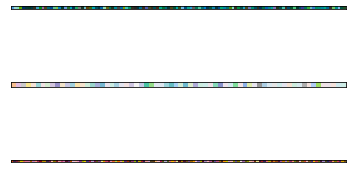

In [44]:
plotColorBars(104, 1, "cBarLan104Spk1")

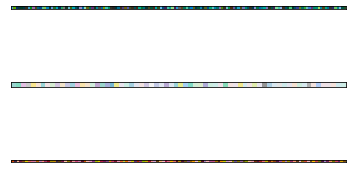

In [43]:
plotModalColorBars(104, "modalCBarLan104")